In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der, fsolve
import math
import numpy.linalg as LA

In [2]:
#Задаём константы
tol = 0.00001

la = 13 # l у основания
lb = 13 # l у основания
lc = 4.25 #L
ld = 4.25 #L
l = la # l у основания
L = lc #L
d = 12

f1 = 0
f2 = 0
work_space = []

In [3]:
# 32 комбинации для начальных точек 
appr = [[1,1,1,1,1],
        [1,1,1,1,-1],
        [1,1,1,-1,1],
        [1,1,1,-1,-1],
    
        [1,1,-1,1,1],
        [1,1,-1,1,-1],
        [1,1,-1,-1,1],
        [1,1,-1,-1,-1],
    
        [1,-1,1,1,1],
        [1,-1,1,1,-1],
        [1,-1,1,-1,1],
        [1,-1,1,-1,-1],
    
        [1,-1,-1,1,1],
        [1,-1,-1,1,-1],
        [1,-1,-1,-1,1],
        [1,-1,-1,-1,-1],
    
        [-1,1,1,1,1],
        [-1,1,1,1,-1],
        [-1,1,1,-1,1],
        [-1,1,1,-1,-1],
    
        [-1,1,-1,1,1],
        [-1,1,-1,1,-1],
        [-1,1,-1,-1,1],
        [-1,1,-1,-1,-1],
    
        [-1,-1,1,1,1],
        [-1,-1,1,1,-1],
        [-1,-1,1,-1,1],
        [-1,-1,1,-1,-1],
    
        [-1,-1,-1,1,1],
        [-1,-1,-1,1,-1],
        [-1,-1,-1,-1,1],
        [-1,-1,-1,-1,-1]]
# appr = [[10,10,10,10,10],
#         [10,10,10,10,-10],
#         [10,10,10,-10,10],
#         [10,10,10,-10,-10],
    
#         [10,10,-10,10,10],
#         [10,10,-10,10,-10],
#         [10,10,-10,-10,10],
#         [10,10,-10,-10,-10],
    
#         [10,-10,10,10,10],
#         [10,-10,10,10,-10],
#         [10,-10,10,-10,10],
#         [10,-10,10,-10,-10],
    
#         [10,-10,-10,10,10],
#         [10,-10,-10,10,-10],
#         [10,-10,-10,-10,10],
#         [10,-10,-10,-10,-10],
    
#         [-10,10,10,10,10],
#         [-10,10,10,10,-10],
#         [-10,10,10,-10,10],
#         [-10,10,10,-10,-10],
    
#         [-10,10,-10,10,10],
#         [-10,10,-10,10,-10],
#         [-10,10,-10,-10,10],
#         [-10,10,-10,-10,-10],
    
#         [-10,-10,10,10,10],
#         [-10,-10,10,10,-10],
#         [-10,-10,10,-10,10],
#         [-10,-10,10,-10,-10],
    
#         [-10,-10,-10,10,10],
#         [-10,-10,-10,10,-10],
#         [-10,-10,-10,-10,10],
#         [-10,-10,-10,-10,-10],
# [1,1,1,1,1],
#         [1,1,1,1,-1],
#         [1,1,1,-1,1],
#         [1,1,1,-1,-1],
    
#         [1,1,-1,1,1],
#         [1,1,-1,1,-1],
#         [1,1,-1,-1,1],
#         [1,1,-1,-1,-1],
    
#         [1,-1,1,1,1],
#         [1,-1,1,1,-1],
#         [1,-1,1,-1,1],
#         [1,-1,1,-1,-1],
    
#         [1,-1,-1,1,1],
#         [1,-1,-1,1,-1],
#         [1,-1,-1,-1,1],
#         [1,-1,-1,-1,-1],
    
#         [-1,1,1,1,1],
#         [-1,1,1,1,-1],
#         [-1,1,1,-1,1],
#         [-1,1,1,-1,-1],
    
#         [-1,1,-1,1,1],
#         [-1,1,-1,1,-1],
#         [-1,1,-1,-1,1],
#         [-1,1,-1,-1,-1],
    
#         [-1,-1,1,1,1],
#         [-1,-1,1,1,-1],
#         [-1,-1,1,-1,1],
#         [-1,-1,1,-1,-1],
    
#         [-1,-1,-1,1,1],
#         [-1,-1,-1,1,-1],
#         [-1,-1,-1,-1,1],
#         [-1,-1,-1,-1,-1],
# [4,4,4,4,4],
#         [4,4,4,4,-4],
#         [4,4,4,-4,4],
#         [4,4,4,-4,-4],
    
#         [4,4,-4,4,4],
#         [4,4,-4,4,-4],
#         [4,4,-4,-4,4],
#         [4,4,-4,-4,-4],
    
#         [4,-4,4,4,4],
#         [4,-4,4,4,-4],
#         [4,-4,4,-4,4],
#         [4,-4,4,-4,-4],
    
#         [4,-4,-4,4,4],
#         [4,-4,-4,4,-4],
#         [4,-4,-4,-4,4],
#         [4,-4,-4,-4,-4],
    
#         [-4,4,4,4,4],
#         [-4,4,4,4,-4],
#         [-4,4,4,-4,4],
#         [-4,4,4,-4,-4],
    
#         [-4,4,-4,4,4],
#         [-4,4,-4,4,-4],
#         [-4,4,-4,-4,4],
#         [-4,4,-4,-4,-4],
    
#         [-4,-4,4,4,4],
#         [-4,-4,4,4,-4],
#         [-4,-4,4,-4,4],
#         [-4,-4,4,-4,-4],
    
#         [-4,-4,-4,4,4],
#         [-4,-4,-4,4,-4],
#         [-4,-4,-4,-4,4],
#         [-4,-4,-4,-4,-4],
# [190,190,190,190,190],
#         [190,190,190,190,-190],
#         [190,190,190,-190,190],
#         [190,190,190,-190,-190],
    
#         [190,190,-190,190,190],
#         [190,190,-190,190,-190],
#         [190,190,-190,-190,190],
#         [190,190,-190,-190,-190],
    
#         [190,-190,190,190,190],
#         [190,-190,190,190,-190],
#         [190,-190,190,-190,190],
#         [190,-190,190,-190,-190],
    
#         [190,-190,-190,190,190],
#         [190,-190,-190,190,-190],
#         [190,-190,-190,-190,190],
#         [190,-190,-190,-190,-190],
    
#         [-190,190,190,190,190],
#         [-190,190,190,190,-190],
#         [-190,190,190,-190,190],
#         [-190,190,190,-190,-190],
    
#         [-190,190,-190,190,190],
#         [-190,190,-190,190,-190],
#         [-190,190,-190,-190,190],
#         [-190,190,-190,-190,-190],
    
#         [-190,-190,190,190,190],
#         [-190,-190,190,190,-190],
#         [-190,-190,190,-190,190],
#         [-190,-190,190,-190,-190],
    
#         [-190,-190,-190,190,190],
#         [-190,-190,-190,190,-190],
#         [-190,-190,-190,-190,190],
#         [-190,-190,-190,-190,-190],
# [366,366,366,366,366],
#         [366,366,366,366,-366],
#         [366,366,366,-366,366],
#         [366,366,366,-366,-366],
    
#         [366,366,-366,366,366],
#         [366,366,-366,366,-366],
#         [366,366,-366,-366,366],
#         [366,366,-366,-366,-366],
    
#         [366,-366,366,366,366],
#         [366,-366,366,366,-366],
#         [366,-366,366,-366,366],
#         [366,-366,366,-366,-366],
    
#         [366,-366,-366,366,366],
#         [366,-366,-366,366,-366],
#         [366,-366,-366,-366,366],
#         [366,-366,-366,-366,-366],
    
#         [-366,366,366,366,366],
#         [-366,366,366,366,-366],
#         [-366,366,366,-366,366],
#         [-366,366,366,-366,-366],
    
#         [-366,366,-366,366,366],
#         [-366,366,-366,366,-366],
#         [-366,366,-366,-366,366],
#         [-366,366,-366,-366,-366],
    
#         [-366,-366,366,366,366],
#         [-366,-366,366,366,-366],
#         [-366,-366,366,-366,366],
#         [-366,-366,366,-366,-366],
    
#         [-366,-366,-366,366,366],
#         [-366,-366,-366,366,-366],
#         [-366,-366,-366,-366,366],
#         [-366,-366,-366,-366,-366],
# [0.5,0.5,0.5,0.5,0.5],
#         [0.5,0.5,0.5,0.5,-0.5],
#         [0.5,0.5,0.5,-0.5,0.5],
#         [0.5,0.5,0.5,-0.5,-0.5],
    
#         [0.5,0.5,-0.5,0.5,0.5],
#         [0.5,0.5,-0.5,0.5,-0.5],
#         [0.5,0.5,-0.5,-0.5,0.5],
#         [0.5,0.5,-0.5,-0.5,-0.5],
    
#         [0.5,-0.5,0.5,0.5,0.5],
#         [0.5,-0.5,0.5,0.5,-0.5],
#         [0.5,-0.5,0.5,-0.5,0.5],
#         [0.5,-0.5,0.5,-0.5,-0.5],
    
#         [0.5,-0.5,-0.5,0.5,0.5],
#         [0.5,-0.5,-0.5,0.5,-0.5],
#         [0.5,-0.5,-0.5,-0.5,0.5],
#         [0.5,-0.5,-0.5,-0.5,-0.5],
    
#         [-0.5,0.5,0.5,0.5,0.5],
#         [-0.5,0.5,0.5,0.5,-0.5],
#         [-0.5,0.5,0.5,-0.5,0.5],
#         [-0.5,0.5,0.5,-0.5,-0.5],
    
#         [-0.5,0.5,-0.5,0.5,0.5],
#         [-0.5,0.5,-0.5,0.5,-0.5],
#         [-0.5,0.5,-0.5,-0.5,0.5],
#         [-0.5,0.5,-0.5,-0.5,-0.5],
    
#         [-0.5,-0.5,0.5,0.5,0.5],
#         [-0.5,-0.5,0.5,0.5,-0.5],
#         [-0.5,-0.5,0.5,-0.5,0.5],
#         [-0.5,-0.5,0.5,-0.5,-0.5],
    
#         [-0.5,-0.5,-0.5,0.5,0.5],
#         [-0.5,-0.5,-0.5,0.5,-0.5],
#         [-0.5,-0.5,-0.5,-0.5,0.5],
#         [-0.5,-0.5,-0.5,-0.5,-0.5],
# [1.6,1.6,1.6,1.6,1.6],
#         [1.6,1.6,1.6,1.6,-1.6],
#         [1.6,1.6,1.6,-1.6,1.6],
#         [1.6,1.6,1.6,-1.6,-1.6],
    
#         [1.6,1.6,-1.6,1.6,1.6],
#         [1.6,1.6,-1.6,1.6,-1.6],
#         [1.6,1.6,-1.6,-1.6,1.6],
#         [1.6,1.6,-1.6,-1.6,-1.6],
    
#         [1.6,-1.6,1.6,1.6,1.6],
#         [1.6,-1.6,1.6,1.6,-1.6],
#         [1.6,-1.6,1.6,-1.6,1.6],
#         [1.6,-1.6,1.6,-1.6,-1.6],
    
#         [1.6,-1.6,-1.6,1.6,1.6],
#         [1.6,-1.6,-1.6,1.6,-1.6],
#         [1.6,-1.6,-1.6,-1.6,1.6],
#         [1.6,-1.6,-1.6,-1.6,-1.6],
    
#         [-1.6,1.6,1.6,1.6,1.6],
#         [-1.6,1.6,1.6,1.6,-1.6],
#         [-1.6,1.6,1.6,-1.6,1.6],
#         [-1.6,1.6,1.6,-1.6,-1.6],
    
#         [-1.6,1.6,-1.6,1.6,1.6],
#         [-1.6,1.6,-1.6,1.6,-1.6],
#         [-1.6,1.6,-1.6,-1.6,1.6],
#         [-1.6,1.6,-1.6,-1.6,-1.6],
    
#         [-1.6,-1.6,1.6,1.6,1.6],
#         [-1.6,-1.6,1.6,1.6,-1.6],
#         [-1.6,-1.6,1.6,-1.6,1.6],
#         [-1.6,-1.6,1.6,-1.6,-1.6],
    
#         [-1.6,-1.6,-1.6,1.6,1.6],
#         [-1.6,-1.6,-1.6,1.6,-1.6],
#         [-1.6,-1.6,-1.6,-1.6,1.6],
#         [-1.6,-1.6,-1.6,-1.6,-1.6],
# [3,3,3,3,3],
#         [3,3,3,3,-3],
#         [3,3,3,-3,3],
#         [3,3,3,-3,-3],
    
#         [3,3,-3,3,3],
#         [3,3,-3,3,-3],
#         [3,3,-3,-3,3],
#         [3,3,-3,-3,-3],
    
#         [3,-3,3,3,3],
#         [3,-3,3,3,-3],
#         [3,-3,3,-3,3],
#         [3,-3,3,-3,-3],
    
#         [3,-3,-3,3,3],
#         [3,-3,-3,3,-3],
#         [3,-3,-3,-3,3],
#         [3,-3,-3,-3,-3],
    
#         [-3,3,3,3,3],
#         [-3,3,3,3,-3],
#         [-3,3,3,-3,3],
#         [-3,3,3,-3,-3],
    
#         [-3,3,-3,3,3],
#         [-3,3,-3,3,-3],
#         [-3,3,-3,-3,3],
#         [-3,3,-3,-3,-3],
    
#         [-3,-3,3,3,3],
#         [-3,-3,3,3,-3],
#         [-3,-3,3,-3,3],
#         [-3,-3,3,-3,-3],
    
#         [-3,-3,-3,3,3],
#         [-3,-3,-3,3,-3],
#         [-3,-3,-3,-3,3],
#         [-3,-3,-3,-3,-3]]











In [4]:
#Условие попадания в рабочую область
#     D1=(
#         2 * (-1*(x+d/2)/(y)) * ( (x+d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#         )**2
#         -4*(1 + (x+d/2)**2/(y**2) ) * ( 
#                                         ( (x+d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#                                         )**2 -la**2
#                                      ) 
#     D2=(
#         2 * (-1*(x-d/2)/(y)) * ( (x-d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#         )**2
#         -4*(1 + (x-d/2)**2/(y**2) ) * ( 
#                                         ( (x-d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#                                         )**2 -la**2
#                                      )     

In [5]:
#задаём функцию, работающую, как чёрный ящик, которая принимает точку и d и говорит, попали ли мы в рабочую область
def is_inside(x, y, d):
    D1=(2 * (-1*(x)/(y)) * ( (x)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) ))**2 - 4*(1 + ((x)**2)/(y**2) ) * ( ( (x)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )**2 - la**2) 
    D2=(2 * (-1*(x-d)/(y)) * ( (x-d)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) ))**2 - 4*(1 + ((x-d)**2)/(y**2) ) * ( ( (x-d)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )**2 - la**2)     
    if D1 >= 0 and D2 >= 0:
        work_space.append([x,y])
        return 1
    return 0

In [6]:
#kinematic equations functions
def kinematic_eq_sing1(z):
    x = z[0]
    y = z[1]
    t1 = z[2]
    t2 = z[3]
    f2 = z[4]

    F = np.empty((5))
    F[0] = (x-l*np.cos(t1)-L*np.cos(f1))
    F[1] = (x-l*np.cos(t2)-L*np.cos(f2)-d)
    F[2] = (y-l*np.sin(t1)-L*np.sin(f1))
    F[3] = (y-l*np.sin(t2)-L*np.sin(f2))
    F[4] = np.sin(t1-f1)
    
    return F

def kinematic_eq_sing2(z):
#сюда идёт другой вектор
    x = z[0]
    y = z[1]
    t1 = z[2]
    t2 = z[3]
    f1 = z[4]

    F = np.empty((5))
    F[0] = (x-l*np.cos(t1)-L*np.cos(f1))
    F[1] = (x-l*np.cos(t2)-L*np.cos(f2)-d)
    F[2] = (y-l*np.sin(t1)-L*np.sin(f1))
    F[3] = (y-l*np.sin(t2)-L*np.sin(f2))
    F[4] = np.sin(t2-f2)
    
    return F

def kinematic_eq_sing3(z):
    x = z[0]
    y = z[1]
    t1 = z[2]
    t2 = z[3]
    f2 = z[4]

    F = np.empty((5))
    F[0] = (x-l*np.cos(t1)-L*np.cos(f1))
    F[1] = (x-l*np.cos(t2)-L*np.cos(f2)-d)
    F[2] = (y-l*np.sin(t1)-L*np.sin(f1))
    F[3] = (y-l*np.sin(t2)-L*np.sin(f2))
    F[4] = np.sin(f2-f1)
    
    return F

Robot work area:


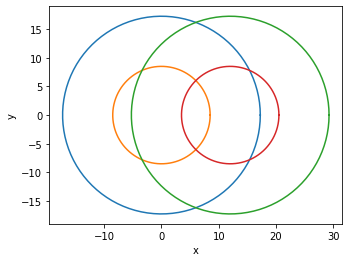

In [7]:
# окружности в питоне легче всего задавать через сферические координаты
# тета меняется от 0 до 2pi
theta = np.linspace(0, 2*np.pi, 100)

x1 = (la+lc)*np.cos(theta)
x2 = (la+lc)*np.sin(theta)
x3 = 2*lc*np.cos(theta)
x4 = 2*lc*np.sin(theta)
x5 = (la+lc)*np.cos(theta)+d
x6 = (la+lc)*np.sin(theta)
x7 = 2*lc*np.cos(theta)+d
x8 = 2*lc*np.sin(theta)

#задаю сетку для расчёта рабочей области
gr_x = np.linspace(-20, 20, 300)
gr_y = np.linspace(-20, 20, 300)
# gr_x = np.linspace(-(la+lc), la+lc+d, 250)
# gr_y = np.linspace(-(la+lc), la+lc+d, 250)
gr_X, gr_Y = np.meshgrid(gr_x,gr_y)
    
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.plot(x3, x4)
ax.plot(x5, x6)
ax.plot(x7, x8)
ax.set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')
print('Robot work area:')
# plt.show()

# plt.scatter(gr_X, gr_Y, color = 'black')
# plt.show()

In [8]:
#функция подсчёта площади
def count_area_new(d_iter):
    S_square=len(gr_x)*len(gr_y) #50 000
    number_of_points = len(gr_x)*len(gr_y) #50 000
    number_inside = 0
    for i in range(len(gr_x)):
        for j in range(len(gr_y)):
            number_inside+=is_inside(gr_x[i], gr_y[j], d_iter)
#             is_gran(gr_x[i], gr_y[j], d_iter)
    S=(S_square*number_inside/number_of_points)/2 # /2 из-за того, что области на графике две, но в реальности она одна
    return S

In [9]:
count_area_new(d)

5113.0

Robot work area:


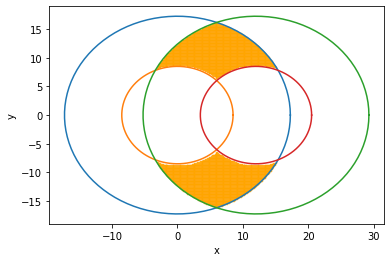

In [10]:
# отрисовка рабочей области
print('Robot work area:')
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.plot(x3, x4)
ax.plot(x5, x6)
ax.plot(x7, x8)
plt.scatter(*zip(*work_space), color = 'orange', s=0.2)
# plt.scatter(*zip(*gran), color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
#генерирую всевозможные углы
num = 500
phi1 = np.linspace(0, 2*np.pi, num)
phi2 = np.linspace(0, 2*np.pi, num)

sing1 = []
sing2 = []

for k in range(len(phi1)):
    sing1.append([phi1[k]])
for k in range(len(phi2)):
    sing2.append([phi2[k]])

In [12]:
z1 = []
for i in sing1:
    j=0
    while j < len(appr):
        f1 = i[0]
        zGuess = appr[j]
        x_tmp1 = fsolve(kinematic_eq_sing1,zGuess)
        f_tmp1 = kinematic_eq_sing1(x_tmp1)
        ar_tmp1 = np.array(f_tmp1)
        if np.linalg.norm(ar_tmp1) < tol:
#          print(np.linalg.norm(ar_tmp1))
            z1.append(np.append(x_tmp1, f1))
        j+=1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [13]:
sing_xy1 = []
for i in z1:
    sing_xy1.append([i[0],i[1]])

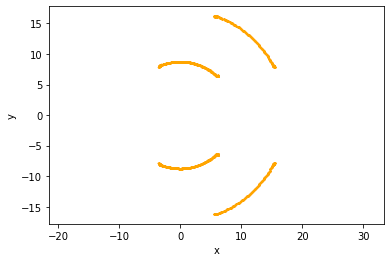

In [14]:
plt.scatter(*zip(*sing_xy1), color = 'orange', s=0.5)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
z2 = []
for i in sing2:
    j=0
    while j < len(appr):
        f2 = i[0]
        zGuess = appr[j]
        x_tmp2 = fsolve(kinematic_eq_sing2,zGuess)
        f_tmp2 = kinematic_eq_sing2(x_tmp2)
        ar_tmp2 = np.array(f_tmp2)
        if np.linalg.norm(ar_tmp2) < tol:
            z2.append(np.append(x_tmp2, f2))
        j+=1

In [16]:
sing_xy2 = []
for i in z2:
    sing_xy2.append([i[0],i[1]])

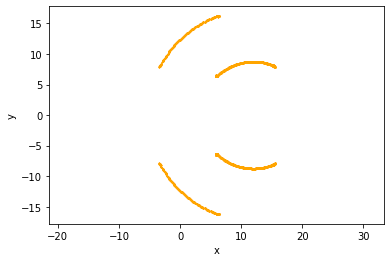

In [17]:
plt.scatter(*zip(*sing_xy2), color = 'orange', s=0.5)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
z3 = []
for i in sing1:
    j=0
    while j < len(appr):
        f1 = i[0]
        zGuess = appr[j]
        x_tmp3 = fsolve(kinematic_eq_sing3,zGuess)
        f_tmp3 = kinematic_eq_sing3(x_tmp3)
        ar_tmp3 = np.array(f_tmp3)
        if np.linalg.norm(ar_tmp3) < tol:
            z3.append(np.append(x_tmp3, f1))
        j+=1

In [19]:
sing_xy3 = []
for i in z3:
    sing_xy3.append([i[0],i[1]])

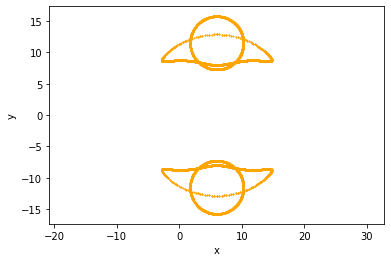

In [20]:
plt.scatter(*zip(*sing_xy3), color = 'orange', s=0.5)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

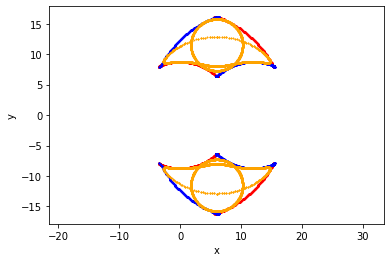

In [21]:
plt.scatter(*zip(*sing_xy1), color = 'red', s=0.5)
plt.scatter(*zip(*sing_xy2), color = 'blue', s=0.5)
plt.scatter(*zip(*sing_xy3), color = 'orange', s=0.5)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#второй случай
la = 13 # l у основания
lb = 13 # l у основания
lc = 4.25 #L
ld = 4.25 #L
l = la # l у основания
L = lc #L
d = 12